# IoT pressure sensor data for Vatnsendi for 2024

<img src="images/IoT_sensor.png" alt="Title" width="700">

## Lets import the data

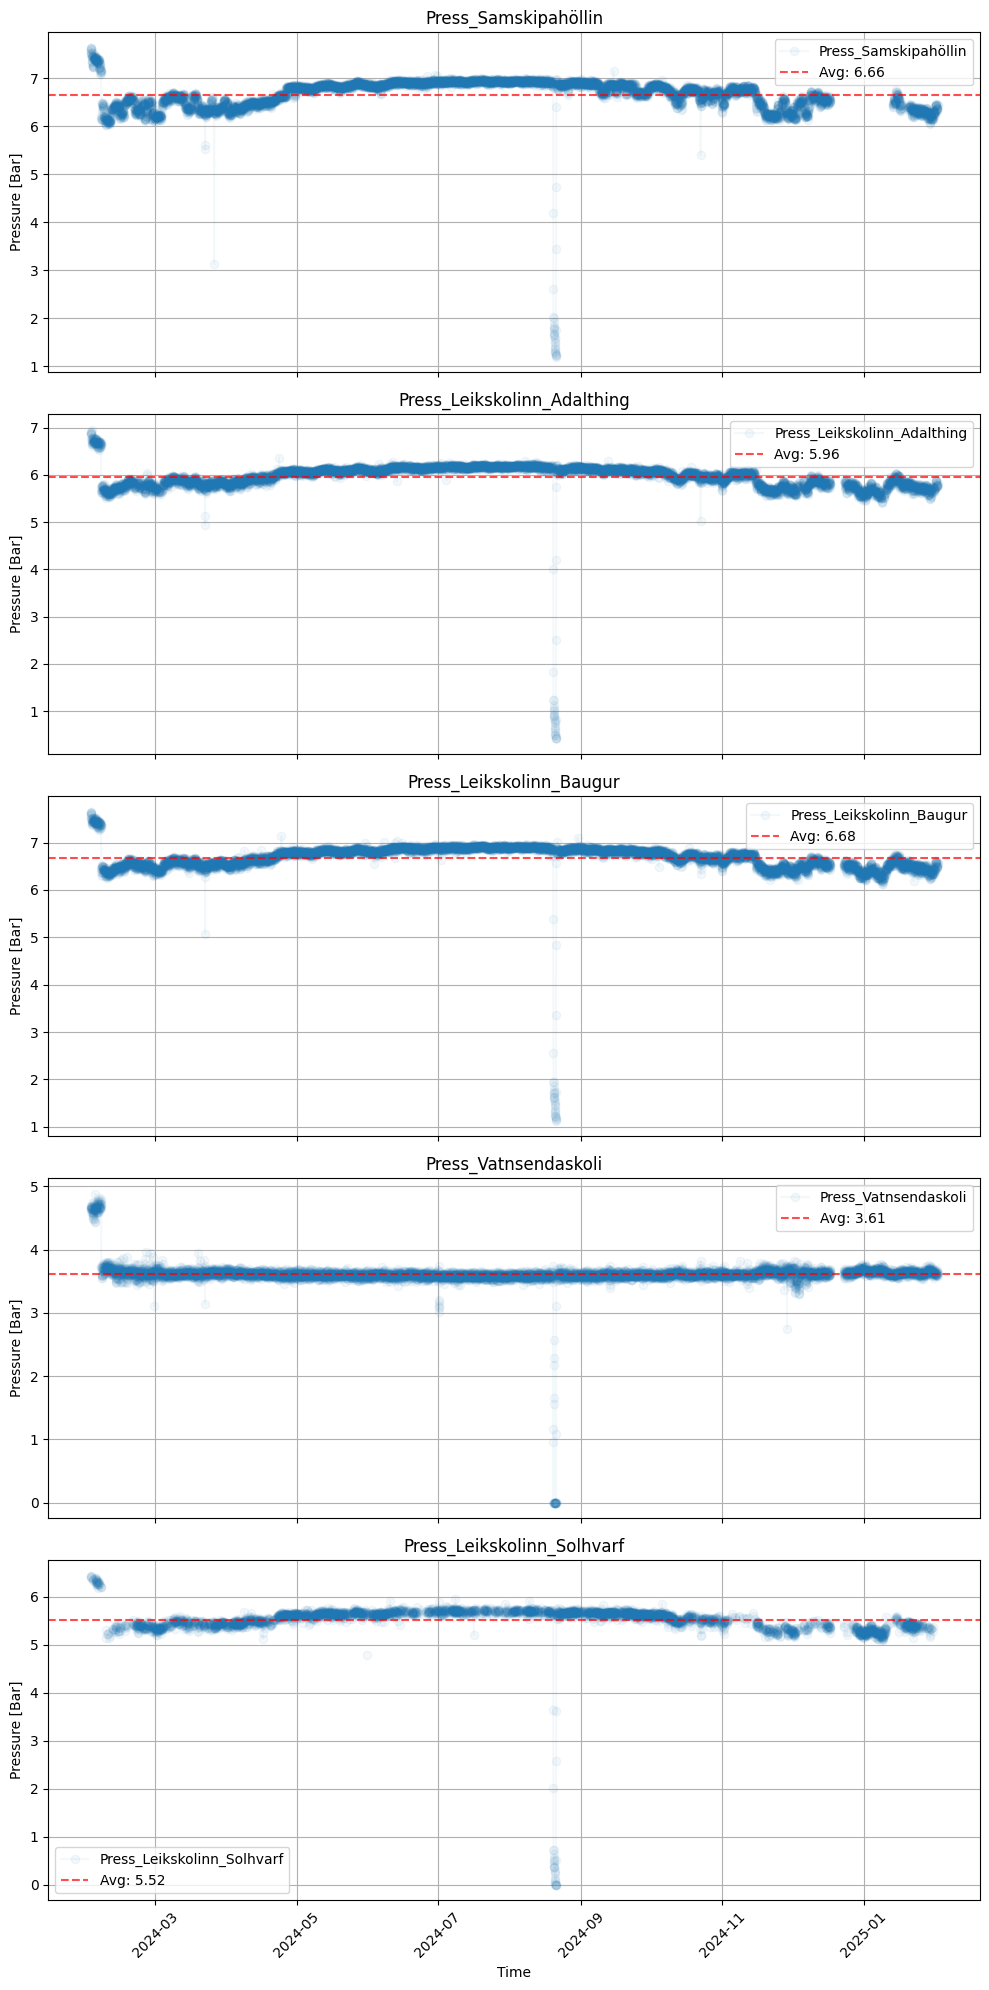

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("Frodi_IoT_Sensor_Vatnsendi.csv", parse_dates=["message_enqueued_time"])

# Set the time column as the index
df.set_index("message_enqueued_time", inplace=True)

# Create individual plots for each column
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 20), sharex=True)

for ax, column in zip(axes, df.columns):
    # Plot the time series data
    ax.plot(df.index, df[column], marker='o', alpha=0.05, label=column)
    
    # Calculate the average and plot it as a dashed line
    avg_value = df[column].mean()
    ax.axhline(avg_value, color='red', linestyle='--', alpha=0.7, label=f'Avg: {avg_value:.2f}')
    
    # Customize the plot
    ax.set_ylabel("Pressure [Bar]")
    ax.set_title(column)
    ax.legend()
    ax.grid()

# Format x-axis
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the CSV file into a DataFrame
df = pd.read_csv("Frodi_IoT_Sensor_Vatnsendi.csv", parse_dates=["message_enqueued_time"])

# Set the time column as the index
df.set_index("message_enqueued_time", inplace=True)

# Drop rows between August 18 and August 22, 2024 (modify year if needed)
df = df[~df.index.to_series().between("2024-08-18", "2024-08-22")]

# Resample data to daily average (24-hour average)
df_daily_avg = df.resample('D').mean()

# Compute yearly average for each sensor
yearly_avg = df_daily_avg.mean()

# Convert DataFrame into long format for Plotly
df_melted = df_daily_avg.reset_index().melt(id_vars="message_enqueued_time", var_name="Sensor", value_name="Pressure")

# Create interactive line plot
fig = px.line(df_melted, 
              x="message_enqueued_time", 
              y="Pressure", 
              color="Sensor",
              markers=True,
              title="24-Hour Average Pressure Readings")

# Add yearly average as dashed horizontal lines with labels
annotations = []
for sensor, avg in yearly_avg.items():
    fig.add_trace(go.Scatter(
        x=df_melted["message_enqueued_time"], 
        y=[avg] * len(df_melted["message_enqueued_time"]),  
        mode="lines",
        name=f"Yearly Avg - {sensor} ({avg:.2f})",  # Display mean in legend
        line=dict(dash="dash", width=2),
        opacity=0.7
    ))

    # Add annotation for each sensor's yearly mean
    annotations.append(dict(
        x=df_melted["message_enqueued_time"].iloc[-1],  # Place at the end of the x-axis
        y=avg,
        text=f"{sensor} Avg: {avg:.2f}",
        showarrow=False,
        font=dict(size=12, color="black"),
        xanchor="left"
    ))

# Customize layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Pressure [Bar]",
    legend_title="Sensor",
    hovermode="x unified",
    annotations=annotations  # Add the annotations to the figure
)

# Show interactive plot
fig.show()
